# Setting Up environment


1.   Install Java
2.   Install and unpack Spark and Hadoop Distributed File System (HDFS)
3.   Define environment variables for Java and Spark
4.   Install and initialize findspark
5.   Check Spark installation



In [1]:
# Java installation
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Downloading Spark and Hadoop Distributed File System (HDFS) files
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Unpacking files
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [3]:
# Importing os library
import os

# Defining Java's system variable
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Defining Spark's system variable
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [4]:
# Necessary to run PySpark
!pip install -q findspark

In [5]:
# Importing installed finspark library
import findspark

# Initialize findspark
findspark.init()

In [6]:
# Importing package to initialize Spark session
from pyspark.sql import SparkSession

# iniciando o spark context
sc = SparkSession.builder.master('local[*]').getOrCreate()

# Verificando se a sessão foi criada
sc

If everything is right, the output of the last cell should per below:

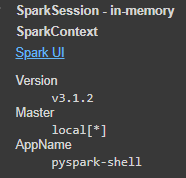

# Downloading Kaggle Dataset

In this case, a customer-churn dataset found [here](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset) will be used. More info on the dataset in this link.

1. Install Kaggle package
2. Upload kaggle.json file with credentials (follow instructions [here](https://www.kaggle.com/discussions/general/74235))
3. Create kaggle directory
4. Upload kaggle.json file
5. Change permition of kaggle json file
6. Copy API command from the Kaggle dataset you want to use by clicking in $\ \vdots$  
 and then "Copy API Command". In this case, [this](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset) dataset is being used
7. Paste the copied command above in a new code cell and run
8. After waiting the download to finish, under the /content diretory you should have the zipped file with the dataset in the /content directory
9. Unzip the data into a directory of choice. In this case, "customer-churn"

In [7]:
# Importing Kaggle package
!pip install -q kaggle

In [8]:
# Upload your Kaggles API secret KEY in file kaggle.json (link: https://www.kaggle.com/discussions/general/74235)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"igornunespatricio","key":"7f5d35c1c5bd7334abed0a8e12172c4c"}'}

In [9]:
# Create kaggle directory
!mkdir ~/.kaggle

In [10]:
# Copy kaggle json file to the created directory
! cp kaggle.json ~/.kaggle/

In [11]:
# Change permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
# Check if everything is correct
!kaggle datasets list

ref                                                       title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023              Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           9162        356  1.0              
juhibhojani/house-price                                   House Price                                        7MB  2023-08-02 16:51:21           1042         38  0.9411765        
arnavsmayan/netflix-userbase-dataset                      Netflix Userbase Dataset                          25KB  2023-07-04 07:38:41          10693        190  1.0              
alphiree/cardiovascular-diseases-risk-prediction-dataset  Cardiovascular Diseases Risk Prediction Dataset

In [13]:
# Downloading the Dataset from Kaggle
!kaggle datasets download -d muhammadshahidazeem/customer-churn-dataset

  0% 0.00/6.66M [00:00<?, ?B/s]
100% 6.66M/6.66M [00:00<00:00, 95.8MB/s]


In [14]:
# Unzipping content to another folder
!unzip /content/customer-churn-dataset.zip -d customer-churn

Archive:  /content/customer-churn-dataset.zip
  inflating: customer-churn/customer_churn_dataset-testing-master.csv  
  inflating: customer-churn/customer_churn_dataset-training-master.csv  


# Exploratory Data Analysis

In [ ]:
# Create Spark session
FILEPATH = "/content/customer-churn/customer_churn_dataset-training-master.csv"
sp = SparkSession.builder.master("local[1]")\
          .appName("Customer-Churn")\
          .getOrCreate()
# Read csv file (if another file  type, search PySpark documentation)
df = sp.read.options(header=True).csv(FILEPATH)

In [ ]:
# Show 10 first rows of dataframe
df.show(10)

+----------+---+------+------+---------------+-------------+-------------+-----------------+---------------+-----------+----------------+-----+
|CustomerID|Age|Gender|Tenure|Usage Frequency|Support Calls|Payment Delay|Subscription Type|Contract Length|Total Spend|Last Interaction|Churn|
+----------+---+------+------+---------------+-------------+-------------+-----------------+---------------+-----------+----------------+-----+
|         2| 30|Female|    39|             14|            5|           18|         Standard|         Annual|        932|              17|    1|
|         3| 65|Female|    49|              1|           10|            8|            Basic|        Monthly|        557|               6|    1|
|         4| 55|Female|    14|              4|            6|           18|            Basic|      Quarterly|        185|               3|    1|
|         5| 58|  Male|    38|             21|            7|            7|         Standard|        Monthly|        396|              29

In [ ]:
df = df.dropna(how="any")

In [ ]:
# Showing dataset Schema
df.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Tenure: string (nullable = true)
 |-- Usage Frequency: string (nullable = true)
 |-- Support Calls: string (nullable = true)
 |-- Payment Delay: string (nullable = true)
 |-- Subscription Type: string (nullable = true)
 |-- Contract Length: string (nullable = true)
 |-- Total Spend: string (nullable = true)
 |-- Last Interaction: string (nullable = true)
 |-- Churn: string (nullable = true)



In [ ]:
# Count rows and columns
print(f'Number of rows: {df.count()}')
print(f'Number of columns: {len(df.columns)}')

Number of rows: 440832
Number of columns: 12


In [ ]:
# Drop duplicates by Customer ID
df = df.dropDuplicates(['CustomerID'])

In [ ]:
# Changing column type
from pyspark.sql.types import (
    StringType, BooleanType, IntegerType, FloatType, DoubleType
)
from pyspark.sql.functions import col

df = df.withColumn("Age", col("Age").cast(IntegerType()))\
.withColumn("Tenure", col("Tenure").cast(IntegerType()))\
.withColumn("Usage Frequency", col("Usage Frequency").cast(IntegerType()))\
.withColumn("Support Calls", col("Support Calls").cast(IntegerType()))\
.withColumn("Payment Delay", col("Payment Delay").cast(IntegerType()))\
.withColumn("Total Spend", col("Total Spend").cast(FloatType()))\
.withColumn("Last Interaction", col("Last Interaction").cast(IntegerType()))\
.withColumn("Churn", col("Churn").cast(IntegerType()))\
.drop(col("CustomerID"))

df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Usage Frequency: integer (nullable = true)
 |-- Support Calls: integer (nullable = true)
 |-- Payment Delay: integer (nullable = true)
 |-- Subscription Type: string (nullable = true)
 |-- Contract Length: string (nullable = true)
 |-- Total Spend: float (nullable = true)
 |-- Last Interaction: integer (nullable = true)
 |-- Churn: integer (nullable = true)



In [ ]:
# Changing column name to replace space with _
for column in df.columns:
    df = df.withColumnRenamed(column, column if ' ' not in column else column.replace(' ','_'))
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Usage_Frequency: integer (nullable = true)
 |-- Support_Calls: integer (nullable = true)
 |-- Payment_Delay: integer (nullable = true)
 |-- Subscription_Type: string (nullable = true)
 |-- Contract_Length: string (nullable = true)
 |-- Total_Spend: float (nullable = true)
 |-- Last_Interaction: integer (nullable = true)
 |-- Churn: integer (nullable = true)



In [ ]:
import pyspark.sql.functions as F
# Number of Churns and not Churns
df.groupBy("Churn") \
    .agg(
        F.count("Churn").alias("num_people"), \
    )\
    .show()

+-----+----------+
|Churn|num_people|
+-----+----------+
|    1|    249999|
|    0|    190833|
+-----+----------+



In [ ]:
from pyspark.sql.functions import struct
def groupby_and_describe(df, group_col, stat_col):
    """
    df has to be a pyspark dataframe
    Compute statistics for the column in stat_col after grouping
    by group_col.
    if stat_col is IntegerType or FloatType, calculates quantiles, median, max,...
    if stat_col is StringType, count occurence by each category
    Take the resulting datafarame and nest the statistics columns.
    """
    assert group_col != stat_col, f"group_col and stat_col can't be the same, they are {group_col} and {stat_col}, respectively."

    grouped = df.groupby(group_col)
    column = df.schema[stat_col]
    # if column is IntegerType or FloatType
    if (isinstance(column.dataType, IntegerType) or isinstance(column.dataType, FloatType)) and (column.name != group_col):
        # group and create statistics
        output = grouped.agg(
            F.mean(stat_col).alias("mean"),
            F.stddev(stat_col).alias("std"),
            F.min(stat_col).alias("min"),
            F.percentile_approx(stat_col, 0.25).alias("25%"),
            F.percentile_approx(stat_col, 0.50).alias("50%"),
            F.percentile_approx(stat_col, 0.75).alias("75%"),
            F.max(stat_col).alias("max"),
        )
        # structure the dataframe
        output = output.select(
            group_col,
            struct("mean", "std", "min", "25%", "50%", "75%", "max")\
            .alias(stat_col)
        )
        return output
    # if the column is StringType
    elif isinstance(column.dataType, StringType) and (column.name != group_col):
        # group by group_col and pivot the stat_col and count occurences
        output = df.groupby(group_col).pivot(stat_col).count()
        # change columns from long to IntegerType
        cols2change = [col for col in output.columns if col != group_col]
        for column in cols2change:
            output = output.withColumn(column, col(column).cast(IntegerType()))
        # Structure the dataframe
        output = output.select(
            group_col,
            struct(cols2change)\
            .alias(stat_col)
        )
        return output

# Join statistics for each column by Churn value keeping nested columns
joined = None
aggregate_cols = [col for col in df.columns if col != "Churn"]
for column in aggregate_cols:
    print(f'Variable: {column}')
    grouped_temp = groupby_and_describe(
        df=df,
        group_col="Churn",
        stat_col=column
        )
    if not joined:
        joined = grouped_temp
    else:
        joined = joined.join(grouped_temp, on=["Churn"])

joined.printSchema()

Variable: Age
Variable: Gender
Variable: Tenure
Variable: Usage_Frequency
Variable: Support_Calls
Variable: Payment_Delay
Variable: Subscription_Type
Variable: Contract_Length
Variable: Total_Spend
Variable: Last_Interaction
root
 |-- Churn: integer (nullable = true)
 |-- Age: struct (nullable = false)
 |    |-- mean: double (nullable = true)
 |    |-- std: double (nullable = true)
 |    |-- min: integer (nullable = true)
 |    |-- 25%: integer (nullable = true)
 |    |-- 50%: integer (nullable = true)
 |    |-- 75%: integer (nullable = true)
 |    |-- max: integer (nullable = true)
 |-- Gender: struct (nullable = false)
 |    |-- Female: integer (nullable = true)
 |    |-- Male: integer (nullable = true)
 |-- Tenure: struct (nullable = false)
 |    |-- mean: double (nullable = true)
 |    |-- std: double (nullable = true)
 |    |-- min: integer (nullable = true)
 |    |-- 25%: integer (nullable = true)
 |    |-- 50%: integer (nullable = true)
 |    |-- 75%: integer (nullable = true)
 

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
boxplots = {}

for column in df.schema:
    print(column.name)
    temp = df.select("Churn", column.name)
    if (isinstance(column.dataType, IntegerType) or isinstance(column.dataType, FloatType)) and (column.name != "Churn"):
        fig = px.box(
            temp.toPandas(),
            x="Churn", y=column.name, color="Churn",
            title=f"{column.name} x Churn"
        )\
        .update_layout(
            yaxis_title=None, xaxis_title=None,
            title_x=0.5, title_font_size=30
        )
        boxplots[column.name] = fig
    elif (isinstance(column.dataType, StringType) and (column.name != "Churn")):
        # create bar chart with plotly
        grouped_test = df.select("Churn", column.name).groupby("Churn").pivot(column.name).count().withColumn("Churn", F.col("Churn").cast("string"))
        y_axis = [item for item in grouped_test.columns if item != "Churn"]
        fig = px.histogram(
            grouped_test.toPandas(),
            x="Churn",
            y=y_axis,
            barnorm="percent",
            text_auto='.2f'
        ).update_layout(
            yaxis_title=None, xaxis_title=None, title=f"Churn x {column.name} (%)",
            title_x=0.5, title_font_size=30
        )
        boxplots[column.name] = fig


import os
from google.colab import files

if not os.path.isdir("charts"):
    os.mkdir("charts")

for key, chart in boxplots.items():
    chart.write_html(f"charts/boxplot_{key}_x_Churn.html")

# for downloading files one by one
# [files.download("charts/" + item) for item in os.listdir("charts")]

# for creating a zip file with the charts and downloading it
!zip -r charts.zip charts/
files.download('charts.zip')

Age
Gender
Tenure
Usage_Frequency
Support_Calls
Payment_Delay
Subscription_Type
Contract_Length
Total_Spend
Last_Interaction
Churn
  adding: charts/ (stored 0%)
  adding: charts/boxplot_Gender_x_Churn.html (deflated 70%)
  adding: charts/boxplot_Contract_Length_x_Churn.html (deflated 70%)
  adding: charts/boxplot_Payment_Delay_x_Churn.html (deflated 74%)
  adding: charts/boxplot_Total_Spend_x_Churn.html (deflated 76%)
  adding: charts/boxplot_Tenure_x_Churn.html (deflated 74%)
  adding: charts/boxplot_Subscription_Type_x_Churn.html (deflated 70%)
  adding: charts/boxplot_Usage_Frequency_x_Churn.html (deflated 74%)
  adding: charts/boxplot_Last_Interaction_x_Churn.html (deflated 74%)
  adding: charts/boxplot_Support_Calls_x_Churn.html (deflated 76%)
  adding: charts/boxplot_Age_x_Churn.html (deflated 74%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Machine Learning

In [15]:
sp = SparkSession.builder.master("local[1]")\
          .appName("Customer-Churn")\
          .getOrCreate()

FILEPATH = "/content/customer-churn/customer_churn_dataset-training-master.csv"
# Read csv file (if another file  type, search PySpark documentation)
df = sp.read.options(header=True).csv(FILEPATH)

df.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Tenure: string (nullable = true)
 |-- Usage Frequency: string (nullable = true)
 |-- Support Calls: string (nullable = true)
 |-- Payment Delay: string (nullable = true)
 |-- Subscription Type: string (nullable = true)
 |-- Contract Length: string (nullable = true)
 |-- Total Spend: string (nullable = true)
 |-- Last Interaction: string (nullable = true)
 |-- Churn: string (nullable = true)



In [16]:
num_churns = df.rdd.map(lambda x: x["Churn"]=='1').sum()
total = df.count()
print(f'Churns: {num_churns}\nTotal Churns: {total}\nProportion of Churns: {num_churns/total:.4%}')

Churns: 249999
Total Churns: 440833
Proportion of Churns: 56.7106%


A "model" predicting only churns would predict 56.71% correct answers (which in this case would also be the accuracy).

## Transformers to apply at pipeline

In [47]:
from pyspark.sql.types import (
    StringType, BooleanType, IntegerType, FloatType, DoubleType
)
from pyspark.sql.functions import col
import pyspark.sql.functions as F

from pyspark.ml import Transformer
from pyspark import ml
from pyspark.sql import DataFrame
from pyspark.ml.feature import VectorAssembler, VectorIndexer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import GBTClassifier
from pyspark.ml import Pipeline
from pyspark import keyword_only
from pyspark.ml.util import DefaultParamsReadable, DefaultParamsWritable
from pyspark.ml.param import Param, Params, TypeConverters

class DropNA(Transformer, DefaultParamsReadable, DefaultParamsWritable):
    """
    Transormer to drop nan rows.
    """

    how = Param(Params._dummy(), 'how', "any or all", TypeConverters.toString)

    @keyword_only
    def __init__(self, how: str = "any"):
        super(DropNA, self).__init__()
        self._setDefault(how="any")
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, outputCols=None, how="any"):
        """
        Sets params for this transformer
        """
        kwargs = self._input_kwargs
        return self._set(**kwargs)

    def setHow(self, how):
        """
        Sets the value of :py:attr:`how`.
        """
        return self._set(how=how)

    def getHow(self):
        """
        Gets the value of :py:attr:`how` or its default value.
        """
        return self.getOrDefault(self.how)

    def _transform(self, df):
        df = df.dropna(how=self.getHow())
        return df

class DropDuplicates(Transformer, DefaultParamsReadable, DefaultParamsWritable):
    """
    Transformer to drop duplicates by columns.
    """

    columns = Param(Params._dummy(), 'columns', 'Columns to seek for duplicates', TypeConverters.toListString)

    @keyword_only
    def __init__(self, columns: list[str]= None):
        super(DropDuplicates, self).__init__()
        self._setDefault(columns=None)
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, outputCols=None, columns=None):
        """
        Sets params for this transformer
        """
        kwargs = self._input_kwargs
        return self._set(**kwargs)

    def setColumns(self, columns):
        """
        Sets the value of :py:attr:`columns`.
        """
        return self._set(columns=columns)

    def getColumns(self):
        """
        Gets the value of :py:attr:`columns` or its default value.
        """
        return self.getOrDefault(self.columns)

    def _transform(self, df: DataFrame) -> DataFrame:
        df = df.dropDuplicates(self.getColumns())
        return df

class DropCols(Transformer, DefaultParamsReadable, DefaultParamsWritable):
    """
    Transformer to drop specified columns in parameter columns from dataframe.
    """

    columns = Param(Params._dummy(), 'columns', 'Columns to drop', TypeConverters.toListString)

    @keyword_only
    def __init__(self, columns: list[str]=None):
        super(DropCols, self).__init__()
        self._setDefault(columns=None)
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, columns=None):
        """
        Set params for this transformer
        """
        kwargs = self._input_kwargs
        return self._set(**kwargs)

    def setColumns(self, columns):
        """
        Sets the value of :py:attr:`columns`
        """
        return self._set(columns=columns)

    def getColumns(self):
        """
        Gets the value of :py:attr:`columns` or its default value.
        """
        return self.getOrDefault(self.columns)

    def _transform(self, df: DataFrame) -> DataFrame:
        df = df.drop(*self.getColumns())
        return df

class KeepIntFloatCols(Transformer, DefaultParamsWritable, DefaultParamsReadable):
    """
    Transformer class that only keeps IntegerType and FloatType columns.
    Also maintains the label column which the user should specify in the parameter
    called labelCol.
    """
    def __init__(self, labelCol: str = "Churn"):
        super(KeepIntFloatCols, self).__init__()
        self.labelCol = labelCol

    def _transform(self, df: DataFrame) -> DataFrame:
        cols = [column.name for column in df.schema if (isinstance(column.dataType, IntegerType) or isinstance(column.dataType, FloatType) or column.name == self.labelCol)]
        return df.select(cols)

class CustomVectorAssembler(Transformer, DefaultParamsWritable, DefaultParamsReadable):
    """
    The only difference from VectorAssembler class is that:
    1) Removes the label column (labelCol parameter) from the assembler
    2) Set all columns from df as InputCols (if as a stage in pipeline, uses the previous df)
    """

    labelCol = Param(Params._dummy(), 'labelCol', 'Label column', TypeConverters.toString)

    @keyword_only
    def __init__(self, labelCol: str = None):
        super(CustomVectorAssembler, self).__init__()
        self.transformer = VectorAssembler(handleInvalid="skip", outputCol='features')
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, labelCol: str = None):
        kwargs = self._input_kwargs
        return self._set(**kwargs)

    def setlabelCol(self, labelCol: str = None):
        return self._set(labelCol=labelCol)

    def getlabelCol(self):
        return self.getOrDefault(self.labelCol)

    def _transform(self, df) -> DataFrame:
        inputCols = [col for col in df.columns if col != self.getlabelCol()]
        self.transformer.setInputCols(inputCols)
        df = self.transformer.transform(df)
        df = df.drop(*inputCols)
        return df

class CastCols(Transformer, DefaultParamsWritable, DefaultParamsReadable):
    """
    Cast specific columns to IntegerType and Float Type.
    This transformations is specific for the customer churn dataset,
    one can change the transformation method to update the class to
    their specific needs.
    """

    columns = Param(Params._dummy(), 'columns', 'dictionary of form {column_name, type} to cast columns')

    @keyword_only
    def __init__(self, columns=dict):
        super(CastCols, self).__init__()
        self._setDefault(columns=None)
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, columns=None):
        """
        Set params for this transformer
        """
        kwargs = self._input_kwargs
        return self._set(**kwargs)

    def setColumns(self, columns):
        """
        Sets the value of :py:attr:`columns`
        """
        return self._set(columns=columns)

    def getColumns(self):
        """
        Gets the value of :py:attr:`columns` or its default value.
        """
        return self.getOrDefault(self.columns)

    def _transform(self, df: DataFrame) -> DataFrame:
        # Casting columns
        for column, col_type in self.getColumns().items():
            if col_type == "integer":
                df = df.withColumn(column, col(column).cast(IntegerType()))
            elif col_type == "float":
                df = df.withColumn(column, col(column).cast(FloatType()))
            elif col_type == 'string':
                df = df.withColumn(column, col(column).cast(StringType()))

        # df = df.withColumn("Age", col("Age").cast(IntegerType()))\
        # .withColumn("Tenure", col("Tenure").cast(IntegerType()))\
        # .withColumn("Usage Frequency", col("Usage Frequency").cast(IntegerType()))\
        # .withColumn("Support Calls", col("Support Calls").cast(IntegerType()))\
        # .withColumn("Payment Delay", col("Payment Delay").cast(IntegerType()))\
        # .withColumn("Total Spend", col("Total Spend").cast(FloatType()))\
        # .withColumn("Last Interaction", col("Last Interaction").cast(IntegerType()))\
        # .withColumn("Churn", col("Churn").cast(IntegerType()))
        return df

class RenameCols(Transformer, DefaultParamsWritable, DefaultParamsReadable):
    """
    Rename the column replacing space with replacer parameter
    This transformations are specific for the customer churn dataset,
    one can change the transformation method to update the class to
    their specific needs.
    """

    to_replace = Param(Params._dummy(), 'to_replace', 'String to replace', TypeConverters.toString)
    replacer = Param(Params._dummy(), 'replacer', 'String to replace to', TypeConverters.toString)

    @keyword_only
    def __init__(self, to_replace: str = " ", replacer: str = "_"):
        super(RenameCols, self).__init__()
        self._setDefault(to_replace=" ")
        self._setDefault(replacer="_")

    @keyword_only
    def setParams(self, to_replace=" ", replacer="_"):
        """
        Set params for this transformer
        """
        kwargs = self._input_kwargs
        return self._set(**kwargs)

    def setReplacer(self, replacer):
        """
        Sets the value of :py:attr:`replacer`
        """
        return self._set(replacer=replacer)

    def getReplacer(self):
        """
        Gets the value of :py:attr:`replacer` or its default value.
        """
        return self.getOrDefault(self.replacer)

    def setToReplace(self, to_replace):
        """
        Sets the value of :py:attr:`to_replace`
        """
        return self._set(to_replace=to_replace)

    def getToReplace(self):
        """
        Gets the value of :py:attr:`to_replace` or its default value.
        """
        return self.getOrDefault(self.to_replace)

    def _transform(self, df: DataFrame) -> DataFrame:
        # Renaming columns
        for column in df.columns:
            df = df.withColumnRenamed(column, column if self.getToReplace() not in column else column.replace(self.getToReplace(), self.getReplacer()))
        return df

In [18]:
import abc
import sys, inspect

def set_module(clazz: abc.ABCMeta):
    """
    Adds the clazz to the module.
    Further, this will help when loading pipeline in pyspark.
    Solution in: https://www.reddit.com/r/MachineLearning/comments/dohht7/p_spark_ml_saving_pyspark_custom_transformers_in/?rdt=38667
    """
    m = __import__(clazz.__module__)
    setattr(m, clazz.__name__, clazz)

for name, obj in inspect.getmembers(sys.modules[__name__], inspect.isclass):
    if inspect.getmodule(obj).__name__.startswith("__main__"):
        set_module(obj)

## Model 1:

- Base Model
- Not using StringType columns
- No Feature Engineering
- No normalization
- Using only IntegerType and FloatType columns
- Nothing else was done

In [92]:
# Creating transformer object for dropping rows with at least one NAN value
drop_na = DropNA(how="any")

# Creating transformer object for dropping duplicates based on CustomerID column
drop_duplicates = DropDuplicates(columns=['CustomerID'])

# Creating transformer object for dropping unnecessary columns
drop_cols = DropCols(columns=["CustomerID"])

# Creating transformer object to cast columns
cast_cols = CastCols(
    columns={
        "Age": "integer",
        "Tenure": "integer",
        "Usage Frequency": "integer",
        "Support Calls": "integer",
        "Payment Delay": "integer",
        "Total Spend": "float",
        "Last Interaction": "integer",
        "Churn": "integer"
    }
)

# Creating transformer object to rename columns
rename_cols = RenameCols(to_replace=" ", replacer="_")

# Creating tranformer object for keeping only IntegerType and FloatType columns (include also labelCol)
keep_int_float_cols = KeepIntFloatCols(labelCol="Churn")

# Creating transformer object for vector assemble (with input cols from the previous stage/df in pipeline)
custom_vector_assembler = CustomVectorAssembler(labelCol='Churn')

In [93]:
no_na = drop_na.transform(df)
no_dupli = drop_duplicates.transform(no_na)
dropped_cols = drop_cols.transform(no_dupli)
casted_cols = cast_cols.transform(dropped_cols)
renamed_cols = rename_cols.transform(casted_cols)
num_cols = keep_int_float_cols.transform(renamed_cols)
num_cols.show()
assembler = custom_vector_assembler.transform(num_cols)
assembler.select('features').first()

+---+------+---------------+-------------+-------------+-----------+----------------+-----+
|Age|Tenure|Usage_Frequency|Support_Calls|Payment_Delay|Total_Spend|Last_Interaction|Churn|
+---+------+---------------+-------------+-------------+-----------+----------------+-----+
| 42|    25|              9|            5|           22|      810.0|               2|    1|
| 52|    40|              2|            5|           16|      460.0|              20|    1|
| 42|    44|              8|            6|            7|      324.0|              23|    1|
| 41|     6|             11|            2|            7|      328.0|              10|    1|
| 43|    52|             27|            1|           12|      559.0|              27|    1|
| 32|    37|              8|            3|           23|      123.0|              14|    1|
| 53|    36|              3|            5|           21|      472.0|              14|    1|
| 39|    52|             22|            8|           23|      613.0|            

Row(features=DenseVector([42.0, 25.0, 9.0, 5.0, 22.0, 810.0, 2.0]))

In [94]:
Pipeline(stages=[
        drop_na, drop_duplicates, drop_cols, cast_cols, rename_cols,
        keep_int_float_cols, custom_vector_assembler
        ]
).fit(df).transform(df)

DataFrame[Churn: int, features: vector]

In [95]:
from xgboost.spark.estimator import SparkXGBClassifier

# Creating the XGBoost Classifier: input col is 'features'by default
gbt_classifier = GBTClassifier(labelCol="Churn", featuresCol="features", maxIter=10)
# xgb_classifier = SparkXGBClassifier(label_col='Churn', features_col="features", num_workers=2)

# Create pipeline of model 1
pipeline_model_1 = Pipeline(
    stages=[
        drop_na, drop_duplicates, drop_cols, cast_cols, rename_cols,
        keep_int_float_cols, custom_vector_assembler,
        gbt_classifier
    ]
)

# Object with grid of parameters to try
paramGrid = ParamGridBuilder()\
  .addGrid(gbt_classifier.maxDepth, [2, 5, 10, 20])\
  .build()

# Define object for evaluation metric
evaluator = BinaryClassificationEvaluator(
    labelCol=gbt_classifier.getLabelCol(),
    rawPredictionCol=gbt_classifier.getPredictionCol()
)

# Define object for crossvalidation (model tuning).
cross_val_model_1 = CrossValidator(
    estimator=pipeline_model_1,
    evaluator=evaluator,
    estimatorParamMaps=paramGrid
)

In [96]:
# FOR TESTING PURPOSES, LIMITING THE TRAINING DATA
df_train = df.limit(10)

In [97]:
# Train the model
best_model_1 = cross_val_model_1.fit(df_train)

In [98]:
# Get best model from cross validation object
best_model = best_model_1.bestModel

In [99]:
# Confusion Matrix
predictions = best_model.transform(df)

predictions.groupby("Churn", "prediction").count().show()

+-----+----------+------+
|Churn|prediction| count|
+-----+----------+------+
|    1|       1.0|249999|
|    0|       1.0|190833|
+-----+----------+------+



In [101]:
predictions.select('probability').distinct().collect()

[Row(probability=DenseVector([0.0659, 0.9341]))]

In [81]:
# evaluaton of the trained model on the train dataset
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")

AUC: 0.0


In [ ]:
# Read test set
FILEPATH_test = r"/content/customer-churn/customer_churn_dataset-testing-master.csv"
df_test = sp.read.options(header=True).csv(FILEPATH)

# Predictions on test set
predictions = best_model.transform(df_test)

In [ ]:
predictions.select('Churn', 'prediction').groupby('Churn').pivot('prediction').count().show()

+-----+------+
|Churn|   1.0|
+-----+------+
|    1|249999|
|    0|190833|
+-----+------+



In [ ]:
# evaluaton of the trained model on the test dataset
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")

AUC: 0.5


Area Under the Curve (AUC) was very very good: 0.9768 on the validation set

In [ ]:
# Save the model
best_model.write().overwrite().save("best_model")

In [ ]:
from pyspark.ml import PipelineModel
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidatorModel

# Loading the model
best_model_loaded = PipelineModel.load(r"best_model/")

In [ ]:
predictions_test_loaded_model = best_model_loaded.transform(df_test)
auc_test_loaded_model = evaluator.evaluate(predictions_test_loaded_model)

print(f"AUC: {auc_test_loaded_model}")

AUC: 0.5


# TODO

1. Need to check how to save and load transformers with parameters passed by user in pyspark

2. apply categorical features also from the link on step 2 above